# Data 620: High Frequency Words

In this assignment we'll look at high frequency words using NLTK. We used NLTK and Project Gutenberg to download Moby Dick by Herman Melville. Using Python we are going to see if the words in Moby Dick follows Zipf's Law.

In [1]:
import nltk
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

# Load Moby Dick

In [19]:
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids()

moby_dick = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(moby_dick)

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/kingdavidxiv/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


260819

# Remove Stop Words

In [20]:
nltk.download('stopwords')
stopWords = nltk.corpus.stopwords.words('english')

moby_stopwords = [word.lower() for word in moby_dick if re.search("\w", word)]
moby_no_stopwords = [e.lower() for e in moby_stopwords if not e.lower() in stopWords]

len(moby_no_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kingdavidxiv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


110719

# Unique Words

In [37]:
unique_moby = nltk.FreqDist(moby_no_stopwords)
unique_moby_stopwords = nltk.FreqDist(moby_stopwords)
len(unique_moby)

16994

# How many unique words represent half of the total words in the Moby Dick?

In [40]:
unique_moby_df = pd.DataFrame(unique_moby_stopwords.most_common(len(unique_moby_stopwords)))

counter = 0

half = 0
for i in range(0, len(unique_moby_df[1])):
    counter = counter + unique_moby_df[1][i]
    if counter >= len(moby_stopwords)/2:
        half = i
        break
        
half

90

#  Top 200 highest frequency words  

In [42]:
top_words = pd.DataFrame(top_words, columns = ['Word', 'Count'])
top_words.head(200)

,Word,Count
0,whale,1226
1,one,921
2,like,647
3,upon,566
4,man,527
5,ship,518
6,ahab,511
7,ye,472
8,sea,455
9,old,450


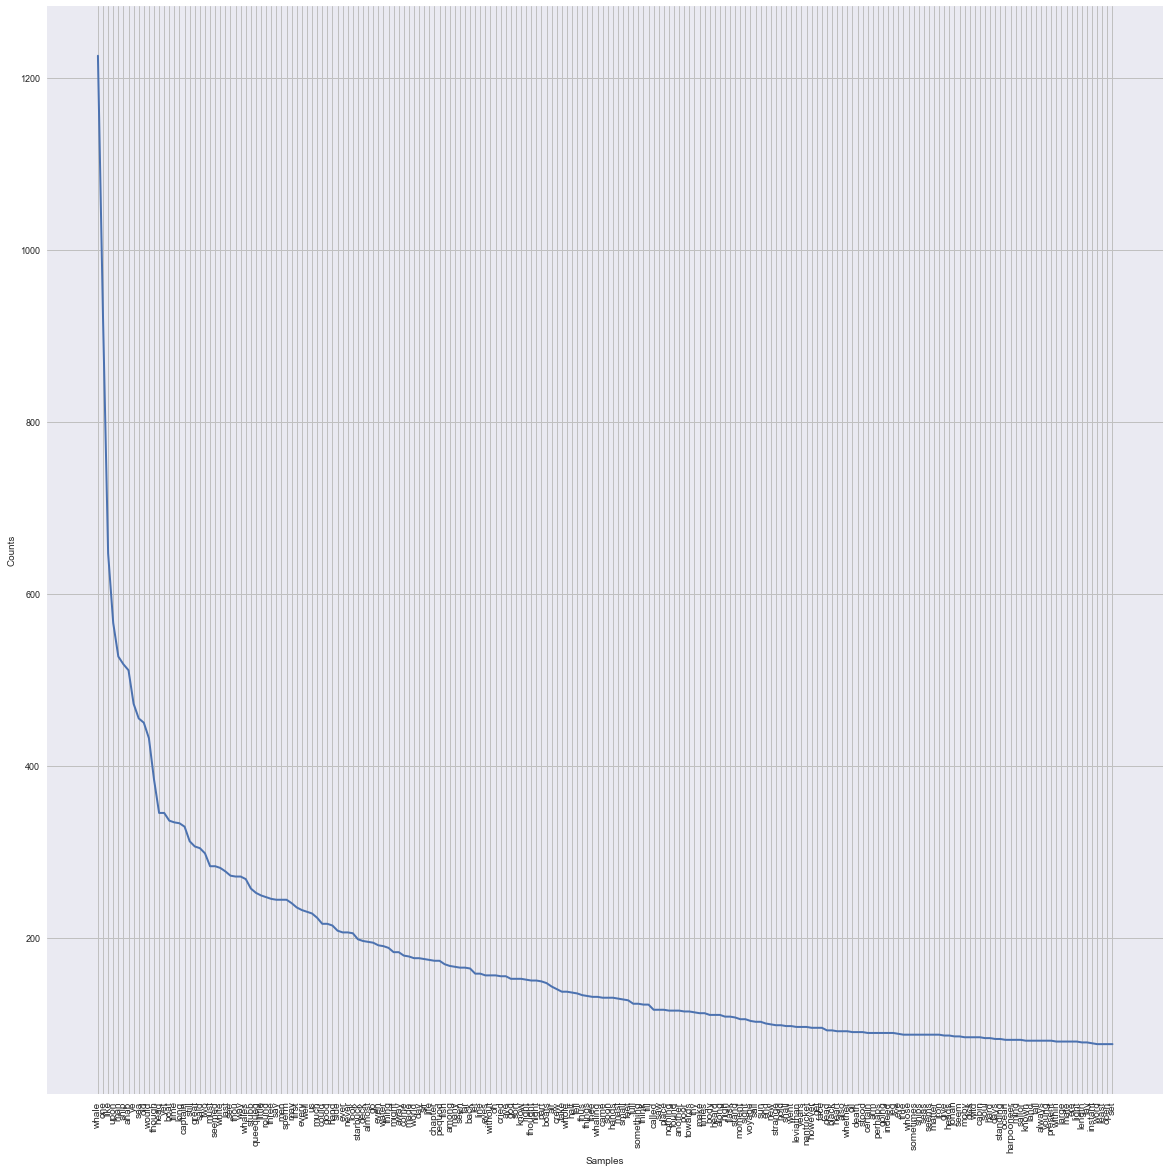

In [50]:
plt.figure(figsize=(20, 20))
plt.rc('xtick', labelsize=10) 
unique_moby.plot(200)

# Zipf's Law 

We test for Zipf's Law by plotting the frequency of the top 500 words on a log scale. This plot should form a straight line but our data doesn't show this. Zipf's Law says that the most common word shows up n times then the next most common word should show up n/2 times and the next one half of that, and so on. Being about a ship captain and his pursuit of a whale, Moby Dick uses a lot of words areound that subject (whale, sea, ship, etc.). This differs from all words in all corpa since Herman Melville's subject matter deals with some words that he must repeat more than others. 

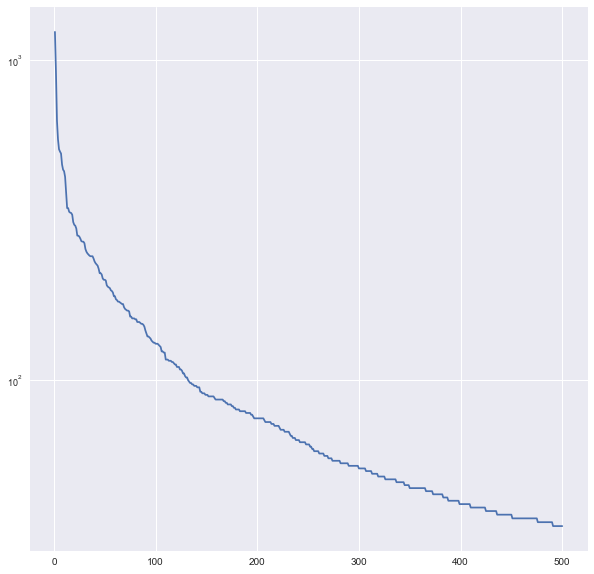

In [52]:
top_500 = unique_moby.most_common(500)
x_vec = [i+1 for i in range(len(top_500))]
y_vec = [freq for (word,freq) in top_500]

plt.figure(1, figsize=(10,10))
plt.semilogy(x_vec, y_vec)
plt.show()